## Діаграма розмаху та гістограма

Для побудови даного типу графіка ми скористаємося мовою Python та кількома бібліотеками цієї мови - matplotlib(для створення графіків), numpy(для обрахунків) та statisitcs(для статистичних обрахунків).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as s

В якості даних я скористаюся своїм власним набором даних - покупками на AliExpress. Для побудови графіку мені потрібен мінімальний набір даних, тож я скористаюся простим списком замісь завантаження цілої таблиці. Цей набір даних назву data.

In [2]:
data = [4.02, 5.05, 0.9, 2.35, 1.38, 1.39, 2.26, 2.74, 1.78, 1.89, 2.14, 2.41, 4.42, 2.89, 3.03, 5.12, 9.89, 3.85, 4.2, 4.65, 4.42, 4.65, 4.92, 11.56, 7.07, 7.17, 7.34, 8.1, 8.84, 9.12, 9.44, 9.87, 8.57, 11.4, 11.88, 59.4, 14.13, 12.51, 12.79, 13.56, 12.95, 14.84, 16.6, 19.18, 16.33, 17.72, 19.49, 24.55, 24.74, 24.31]
data = np.array(data)

Тепер створюємо візуалізацію цих даних на основі matplotlib.

Спочатку я покажу коробковий графік:

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd7c68273a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd7c68278e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd7c6827100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd7c6827e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd7c6839100>],
 'means': []}

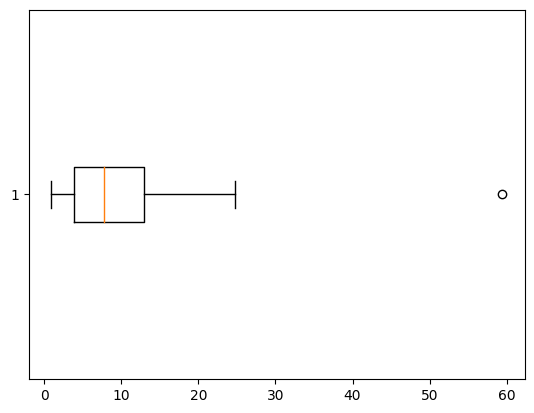

In [3]:
plt.boxplot(x=data,vert=False)

Що ми тут бачимо:
На діаграмі розмаху ми можемо побачити, як дані покупок розмістилися відносно квартилів. Квартилі - фактично, це дані, що розділені на 4 частини. Якщо брати весь набір даних за 100 %, то перший квартиль - це значення від 0 до 25%(найменші значення), другий - значення від 25% до 50%, третій - від 50% до 75% і четвертий - від 75% до 100%(всі найбільші значення). "Коробка" цієї діаграми охоплює другий та третій квартиль (25%-75%), їх ще називають міжквартильним розмахом. Лівий вус охоплює перший квартиль, а правий - показує найбільше значення в межах 1,5 міжквартильних розмахи верхнього квартиля. Кружечки - це так звані "викиди"(outliers), які знаходять за межами міжквартильного розмаху. В даному випадку викидом являється покупка ламп на суму 59,4 долари.

Тепер погляньмо на гістограму:

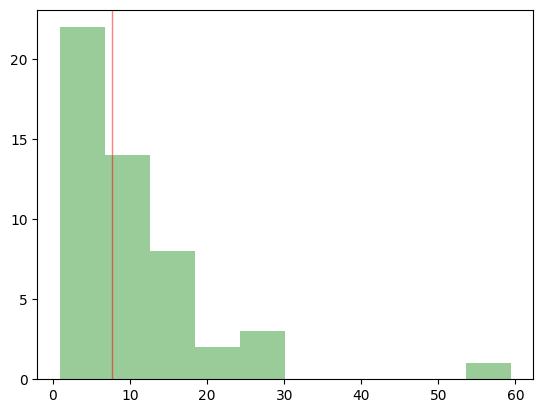

In [7]:
plt.hist(x=data, color='green',alpha = 0.4)
plt.axvline(medians, color='red', alpha = 0.5, linewidth=1, label="Медіана")

На цій гістограмі ми бачимо, як саме розподілилися значення. Зокрема, найбільше покупок було вартістю до 5 доларів. Це викликає праву асиметрію у розподілі даних. 
Також можемо побачити викид на шкалі, про який згадували при розгляді діаграми розмаху.

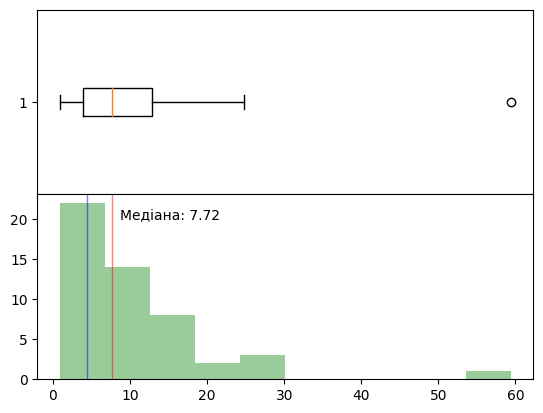

In [9]:
fig, axes = plt.subplots(2, 1, sharex=True)
medians = s.median(data)
min_ylim, max_ylim = plt.ylim()
plt.text(medians+1, 20, s='Медіана: {:.2f}'.format(medians))
axes[0].boxplot(data, vert = False)
axes[1].hist(x=data, color='green', alpha =0.4)
plt.axvline(medians, color='red', alpha = 0.5, linewidth=1, label="Медіана")
plt.axvline(s.mode(data), color='blue', alpha = 0.5, linewidth=1, label="Мода")
fig.subplots_adjust(wspace=0, hspace=0)

Тепер погляньмо на ці дві діаграми разом. Також я додав показник "мода", котрий означає значення, котре найчастіше зустрічається.
Що можна тут побачити? 
Покупець купує в основному товар ціною орієнтовно між 4 та 13 доларами, надаючи перевагу товарам ціною до 10 доларів. Покупки більше 20 доларів являються рідкістю. 
Для глибших інсайтів потрібно не вистачає інформації. Наприклад, чи використовувалися промокоди, категорія товару, котра купувалася, періодичність купівлі товарів на платформі.